In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

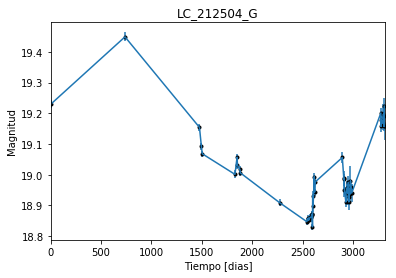

In [2]:
data = np.genfromtxt('LC_212504_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_212504_G')
plt.savefig("LC_212504_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

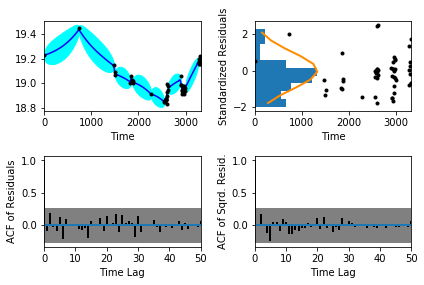

In [5]:
sample.assess_fit()

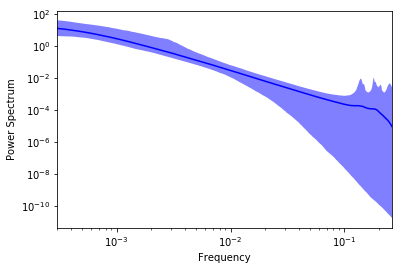

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

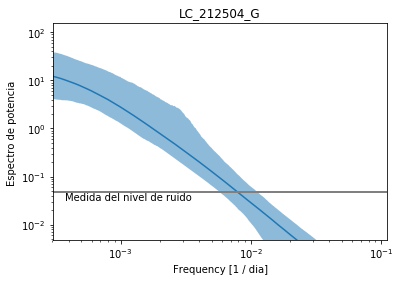

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_212504_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_212504_G')

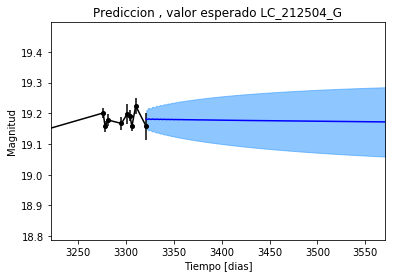

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_212504_G')

Text(0.5,1,'Prediccion, Caminos simulados LC_212504_G')

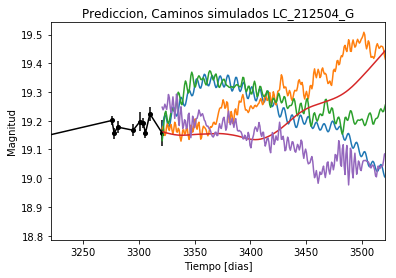

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_212504_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


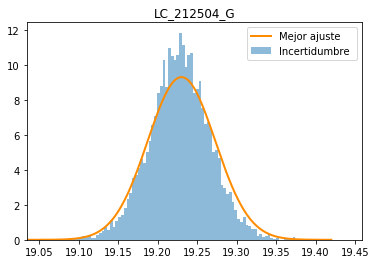

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_212504_G')
plt.savefig("Mejor_ajuste_LC_212504_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_212504_G')

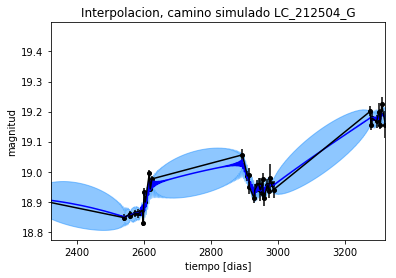

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_212504_G')

Text(0.5,1,'Interpolacion, camino simulado  LC_212504_G')

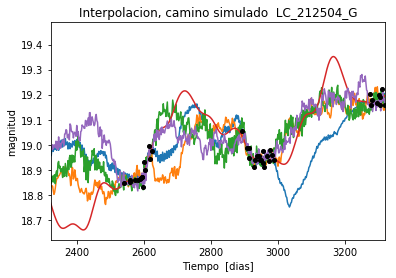

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado  LC_212504_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 766.963472596
Median: 0.00763606236904
Standard deviation: 0.0585910823651
68% credibility interval: [ 0.00116602  0.03048669]
95% credibility interval: [ 0.00038774  0.19506504]
99% credibility interval: [  3.18871017e-04   4.52489286e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 480.161957177
Median: 0.00684762490027
Standard deviation: 0.0253510274309
68% credibility interval: [ 0.00106104  0.02527535]
95% credibility interval: [ 0.00036453  0.08868581]
99% credibility interval: [ 0.00031834  0.16734647]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 184.991756176
Median: 0.103959703486
Standard deviation: 0.148139

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 703.789874564
Median: 111.469344735
Standard deviation: 2.70417583541
68% credibility interval: [ 107.91446533  113.35705868]
95% credibility interval: [ 104.47633956  114.51443382]
99% credibility interval: [ 102.02272237  114.96230643]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 222.460862305
Median: 0.873560005998
Standard deviation: 1.10360712329
68% credibility interval: [ 0.15932957  2.51784429]
95% credibility interval: [ 0.048883    3.53682169]
99% credibility interval: [ 0.02461063  4.73586511]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 186.514300686
Median: 1.76588785742
Standard deviation: 2.09142311211
68% credibility interval: [ 0.76375482  4.16872279]
95% credibility interval: [ 0.03531326  8.2

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2405.28543942
Median: 1.99948364864e-13
Standard deviation: 5.35649877484e+106
68% credibility interval: [  1.25283407e-47   1.28428800e-04]
95% credibility interval: [  6.13715904e-56   1.09902622e+02]
99% credibility interval: [  5.20303011e-061   4.43063638e+107]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1040.04473726
Median: 19.1289731115
Standard deviation: 0.0866707250957
68% credibility interval: [ 19.05454447  19.20867236]
95% credibility interval: [ 18.96885591  19.30084716]
99% credibility interval: [ 18.89743539  19.3693264 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 183.785084443
Median: 0.193876134207
Standard deviation: 0.103225617159
68% credibility interval: [ 0.13480049  0.29584002]
95% credibility interval: [ 0.         0.4203149]
99% credibility interval: [ 0.          0.51782081]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 183.785084443
Median: 0.193876134207
Standard deviation: 0.103225617159
68% credibility interval: [ 0.13480049  0.29584002]
95% credibility interval: [ 0.         0.4203149]
99% credibility interval: [ 0.          0.51782081]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 705.361075364
Median: 0.0
Standard deviation: 0.000426754306499
68% credibil

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 703.789874564
Median: 111.469344735
Standard deviation: 2.70417583541
68% credibility interval: [ 107.91446533  113.35705868]
95% credibility interval: [ 104.47633956  114.51443382]
99% credibility interval: [ 102.02272237  114.96230643]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 342.223684985
Median: 0.0254465395293
Standard deviation: 0.0277639541462
68% credibility interval: [ 0.01743365  0.03989372]
95% credibility interval: [ 0.01272573  0.0794943 ]
99% credibility interval: [ 0.01051105  0.18193251]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 437.390952341
Median: 1.09233134387
Standard deviation: 0.271356167261
68% credibility interval: [ 0.88850199  1.42127871]
95% credibility interval: [ 0.7193138   1.78762515]
99% credibility interval: [ 0.63267294  1.94769563]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 161.612921147
Median: 0.009586942583
Standard deviation: 0.0405561787974
68% credibility interval: [ 0.00098232  0.05972636]
95% credibility interval: [  1.29297516e-06   1.40925901e-01]
99% credibility interval: [  2.32686690e-110   2.26289024e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 766.963472596
Median: (-0.0479787948819-0.285349966658j)
Standard deviation: 0.745781090528
68% credibility interval: [-0.19155355-2.43042483j -0.00732633-1.12742644j]
95% credibility interval: [-1.22562979-2.76517278j -0.00243623-0.84470288j]
99% credibility interval: [ -2.84307403e+00+0.j          -2.00352569e-03-0.85788775j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 480.161957177
Median: (-0.0430248961625+1.92557176802j)
Standard deviation: 0.667858638931
68% credibility interval: [-0.15880969+1.02320217j -0.00666671+1.14487256j]
95% credibility interval: [-0.55722936+1.29589411j -0.00229042+0.78692742j]
99% credibility interval: [-1.05146887+2.62899715j -0.00200020+0.j        ]
Posterior summary for parameter